## Exploratory Data Analysis
### Breast Cancer Wisconsin (Diagnostic) Data Set

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [78]:
%matplotlib inline

#### Description of the dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Attribute Information:

1. ID number
2. Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness ($perimeter^2 / area - 1.0$)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.

All feature values are recoded with four significant digits.

Missing attribute values: none.

Class distribution: 357 benign, 212 malignant.

Let's load the data and take a look.

In [79]:
data = pd.read_csv('../data/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [81]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


#### Insights

* There is an irrelevant column named 'Unnamed: 32' -> we need to drop it.
* The features are not on the same scale -> we need to scale them.
* The target is categorical and encoded with letters 'B'/'M' -> we need to encode it with 0/1.
* There are no missing values in the dataset.

Let's split the dataset and then create preprocessing pipelines with Scikit-Learn.

In [82]:
# First, we drop the unnecessary column
data_processed = data.drop(['Unnamed: 32'], axis=1, errors='ignore')

In [83]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

scaler = StandardScaler()
encoder = LabelEncoder()

In [113]:
from sklearn.model_selection import train_test_split

X = data_processed.drop(['diagnosis'], axis=1)
y = data_processed['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape[0], 'rows in the training set over', X.shape[0], 'total rows') 

455 rows in the training set over 569 total rows


We now apply the preprocessing on the datasets.

In [114]:
X_train_processed = scaler.fit_transform(X_train, y_train)
X_test_processed = scaler.transform(X_test)
y_train_processed = encoder.fit_transform(y_train)
y_test_processed = encoder.transform(y_test)

Now we have appropriate data to train a ML model. But first, let's look at the features more closely and how they are related to one another.

In [87]:
data_processed['diagnosis'] = data['diagnosis'].map({ 'M': 1, 'B': 0 })
data_processed.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


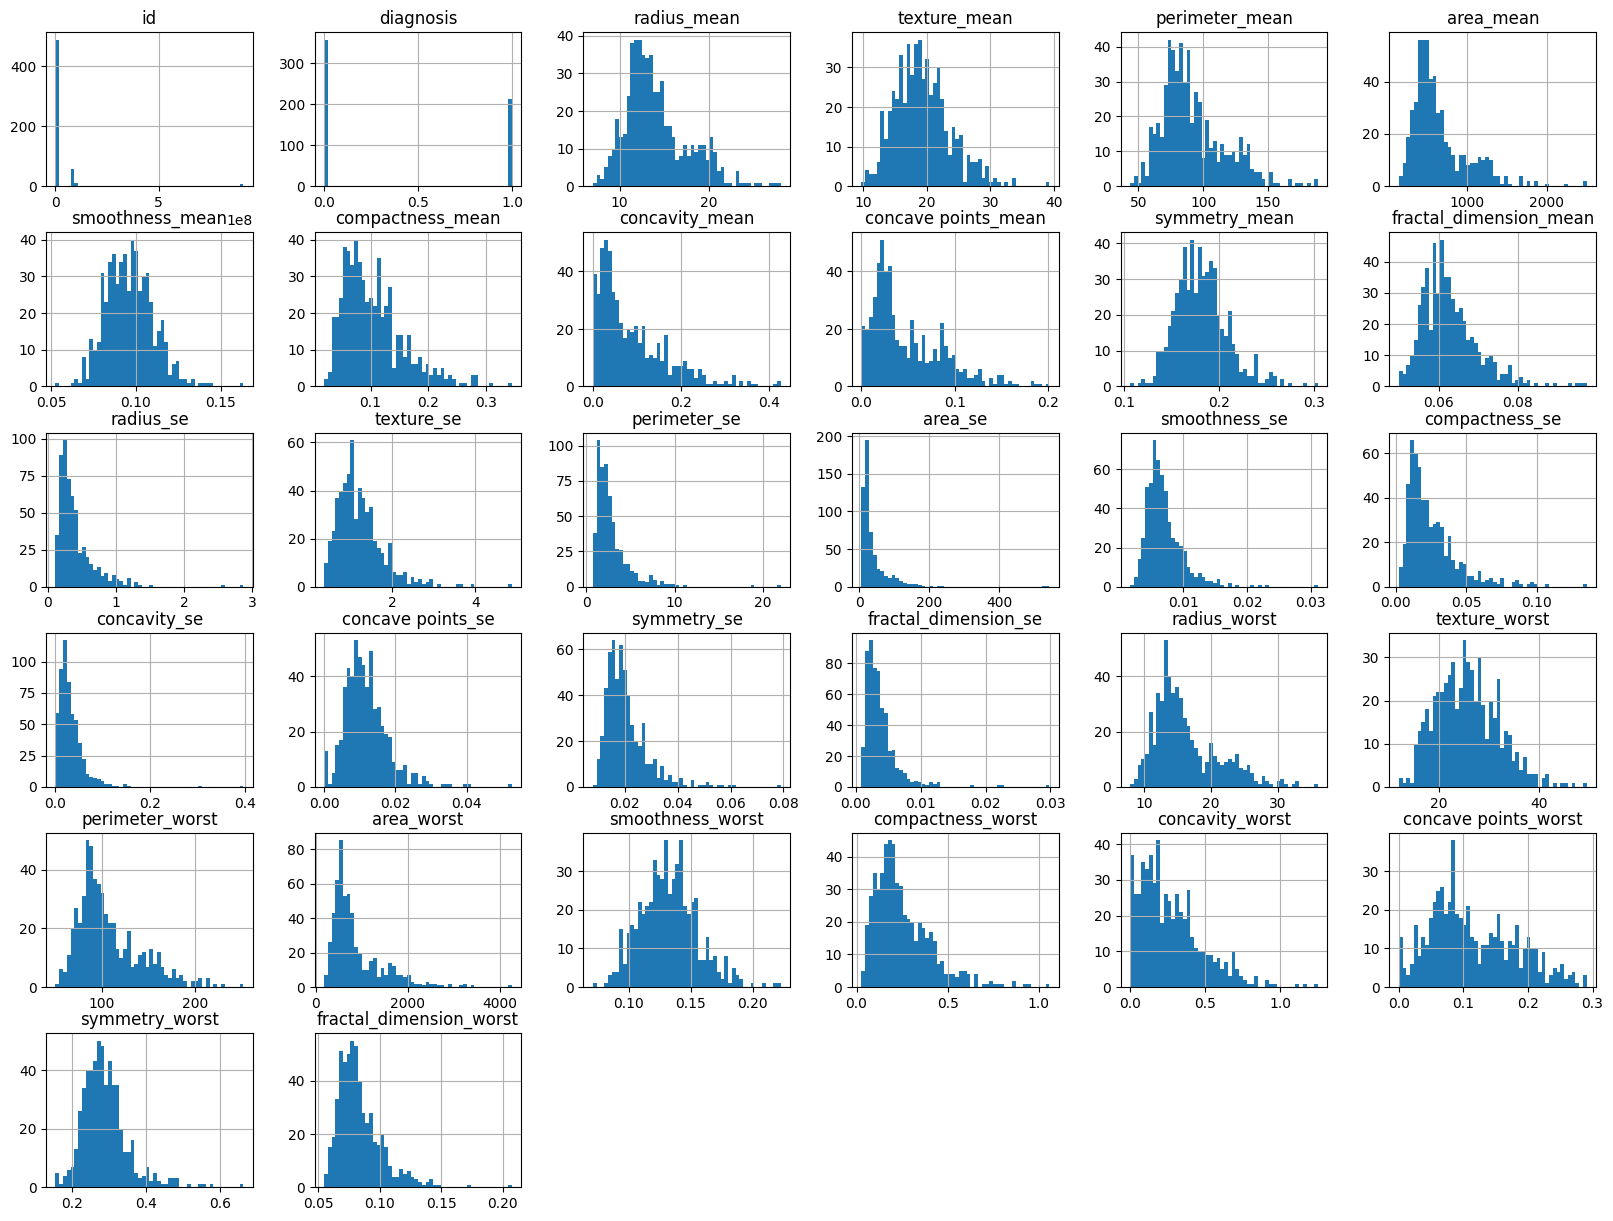

In [89]:
data_processed.hist(bins=50, figsize=(20,15))
plt.show()

Observation: a lot of distributions have positive skew and are heavy-tailed.

In [91]:
corr_matrix = data_processed.corr(method='pearson')
corr_matrix["diagnosis"].sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                         0

Observation: a lot of features are significantly correlated with the diagnosis. It was expected that `id` has almost no correlation but it has higher correlation (in absolute value) than `symmetry_se`, `texture_se` and `fractal_dimension_mean`. We could discard those columns but there are not a lot of features here so there is no need to do so really.

Now let's look at the two features with the highest correlation to the target and try to visualize them on a scatterplot using seaborn.

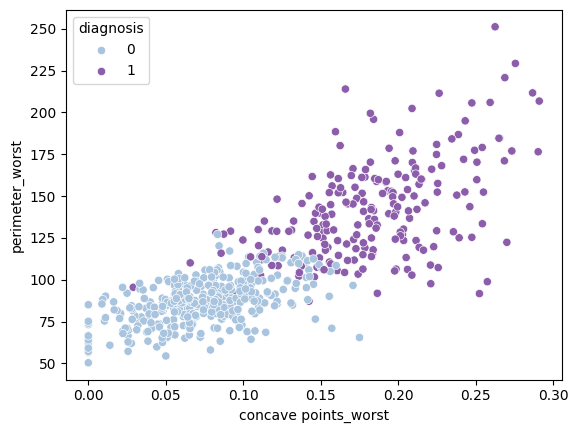

In [95]:
sns.scatterplot(data=data_processed, x='concave points_worst', y='perimeter_worst', hue='diagnosis', palette='BuPu')
plt.show()

Observation: with these two features, it is easy to classify with a linear boundary. A logistic regression might be good enough. We can also try a SVM.

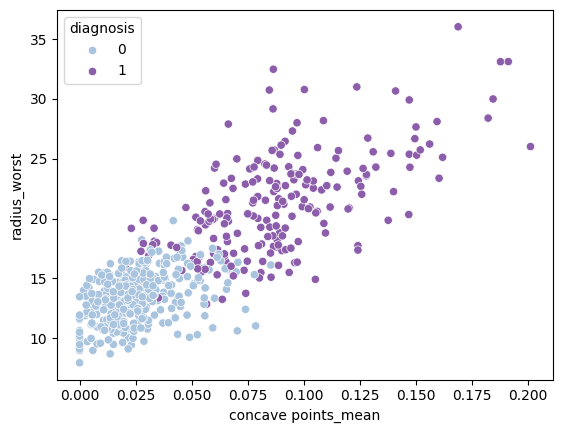

In [110]:
sns.scatterplot(data=data_processed, x='concave points_mean', y='radius_worst', hue='diagnosis', palette='BuPu')
plt.show()

Same observation can be made using other features.

Let's try Logistic Regression as a first model. We use cross-validation to determine the appropriate regularization strenght.

In [132]:
from sklearn.linear_model import LogisticRegressionCV

logistic_reg_cv = LogisticRegressionCV(Cs=10, cv=5, scoring='f1', solver='liblinear', n_jobs=-1)

logistic_reg_cv.fit(X_train_processed, y_train_processed)

LogisticRegressionCV(cv=5, n_jobs=-1, scoring='f1', solver='liblinear')

In [133]:
best_c = logistic_reg_cv.C_[0]
print(f"Best C Value: {best_c}")

Best C Value: 2.782559402207126


We can then train the best logistic regression model and find its validation score using cross-validation.

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_reg_final = LogisticRegression(penalty='l2', C=best_c)
cv_score_log_reg = cross_val_score(log_reg_final, X_train_processed, y_train_processed, scoring='f1', cv=5, n_jobs=-1)
print(cv_score_log_reg.mean())

0.9699683401175939


Let's try to fit a SVM model as well to compare with the logistic regression.

In [135]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'kernel':['linear'], 'C':[1, 3, 10, 20, 50, 100]},
    {'kernel':['rbf', 'poly'], 'C':[1, 3, 10, 20, 50, 100], 'degree':[2, 3, 4], 'gamma':['scale', 'auto']}
]

svc_model = SVC()

grid_search = GridSearchCV(svc_model, param_grid, scoring="f1", n_jobs=-1)
grid_search.fit(X_train_processed, y_train_processed)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 3, 10, 20, 50, 100], 'kernel': ['linear']},
                         {'C': [1, 3, 10, 20, 50, 100], 'degree': [2, 3, 4],
                          'gamma': ['scale', 'auto'],
                          'kernel': ['rbf', 'poly']}],
             scoring='f1')

In [146]:
svc_final = grid_search.best_estimator_
cv_score_svc = cross_val_score(svc_final, X_train_processed, y_train_processed, scoring='f1', n_jobs=-1, cv=5)
print(cv_score_svc.mean())

0.9667022763598707


Logistic Regression has slightly better performance and is a simpler model so let's go with that.